## E-tivity 1: Fitting Data to a Polynomial Using Manual Gradient Descen 

In [59]:
import numpy as np
import matplotlib.pyplot as plt

## Task 1: Create data with noise 

<strong>Objective:</strong> To generate and display data representing a second-degree  polynomial with added noise. It takes specific polynomial coefficients  (a, b, c), a noise range (jitter), and the number of data points to  generate (num_samples) as input. The code returns two arrays, 'x' and  'y', where 'x' represents input values, and 'y' represents noisy output  values.

- 'x' Array: Contains input values generated uniformly between -10 and 10, serving as the independent variable for the polynomial.

- 'y' Array: Contains corresponding noisy output values calculated using the given coefficients (a, b, c) and random noise within the specified range, simulating real-world data.

Changing the coefficients or noise affects the generated data as follows:

- Changing Coefficients (a, b, c): Alters the polynomial's shape and characteristics. Adjusting 'a' changes the steepness, 'b' affects the slope, and 'c' shifts the curve vertically, allowing the modeling of various polynomial functions.

-  Changing Noise (jitter): Increasing 'jitter' adds more noise, making the data less representative of the underlying polynomial and leading to a more scattered dataset. Reducing 'jitter' results in less noisy, more predictable data.

In [60]:
def generate_polynomial_data(a, b, c, jitter, num_samples=100):
    """
    Generate and print data from a second-degree polynomial with noise.

    This code generates data points for a second-degree polynomial with noise, given specific coefficients
    (a, b, c) and a noise range (jitter). It then prints the generated data to the console.

    
    Parameters:
    a (float): Coefficient for the x^2 term in the polynomial.
    b (float): Coefficient for the x term in the polynomial.
    c (float): Constant term in the polynomial.
    jitter (float): Maximum noise range for adding noise to the polynomial.
    num_samples (int): Number of data points to generate.

    Returns:
    x (array): Input values.
    y (array): Corresponding noisy output values.
    """
    #x = np.random.uniform(-10, 10, num_samples)
    x = np.linspace(-10, 10, num_samples)
    y = a * x**2 + b * x + c + np.linspace(-jitter, jitter, num_samples)
    return x, y

In [61]:
a, b, c, jitter = 2, -4, 1, 5
x, y_observed = generate_polynomial_data(a, b, c, jitter)

# Print the generated data
print("Generated data:", "\n")
print("x:", x, "\n")
print("y:", y_observed)

Generated data: 

x: [-10.          -9.7979798   -9.5959596   -9.39393939  -9.19191919
  -8.98989899  -8.78787879  -8.58585859  -8.38383838  -8.18181818
  -7.97979798  -7.77777778  -7.57575758  -7.37373737  -7.17171717
  -6.96969697  -6.76767677  -6.56565657  -6.36363636  -6.16161616
  -5.95959596  -5.75757576  -5.55555556  -5.35353535  -5.15151515
  -4.94949495  -4.74747475  -4.54545455  -4.34343434  -4.14141414
  -3.93939394  -3.73737374  -3.53535354  -3.33333333  -3.13131313
  -2.92929293  -2.72727273  -2.52525253  -2.32323232  -2.12121212
  -1.91919192  -1.71717172  -1.51515152  -1.31313131  -1.11111111
  -0.90909091  -0.70707071  -0.50505051  -0.3030303   -0.1010101
   0.1010101    0.3030303    0.50505051   0.70707071   0.90909091
   1.11111111   1.31313131   1.51515152   1.71717172   1.91919192
   2.12121212   2.32323232   2.52525253   2.72727273   2.92929293
   3.13131313   3.33333333   3.53535354   3.73737374   3.93939394
   4.14141414   4.34343434   4.54545455   4.74747475   4

## Task 2: Predict and visualize 

Data Visualization: 
- The plot_data_and_predictions function is used for data visualization. 
- Creates a plot that displays both observed data and predicted data on the same graph.
- The matplotlib library to create a scatter plot for observed data points and a line plot for predicted data points.
- The x-axis represents the input values (x), and the y-axis represents the output values (y_observed and y_predicted).

Mean Squared Error (MSE):
- The calculate_mean_squared_error function is used to calculate the mean squared error (MSE) between the observed (y_observed) and predicted (y_predicted) values.
- MSE is a common metric used to measure the quality of a regression model. It quantifies the average squared difference between observed and predicted values. A lower MSE indicates a better fit of the model to the data.

Objective: is to perform regression analysis on a dataset represented by x and y_observed. The predicted values, y_predicted, are calculated using a quadratic equation y = a * x^2 + b * x + c, where a, b, and c are parameters that need to be determined through regression.



In [62]:
def plot_data_and_predictions(x, y_observed, y_predicted):
    """
    Plot observed and predicted data on the same graph.

    Parameters:
    x (array): Input values.
    y_observed (array): Observed output values.
    y_predicted (array): Predicted output values.
    """
    plt.scatter(x, y_observed, label="Observed Data", alpha=0.5)
    plt.plot(x, y_predicted, label="Predicted Data", color='red')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.legend()
    plt.show()

def calculate_mean_squared_error(y_observed, y_predicted):
    """
    Calculate the mean squared error between observed and predicted values.

    Parameters:
    y_observed (array): Observed output values.
    y_predicted (array): Predicted output values.

    Returns:
    mse (float): Mean squared error.
    """
    mse = np.mean((y_observed - y_predicted) ** 2)
    return mse

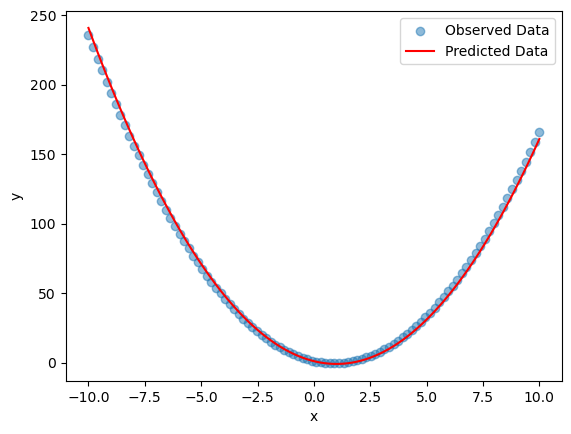

Initial Mean Squared Error: 8.50


In [63]:
y_predicted = a * x**2 + b * x + c
plot_data_and_predictions(x, y_observed, y_predicted)
mse = calculate_mean_squared_error(y_observed, y_predicted)
print(f"Initial Mean Squared Error: {mse:.2f}")

## Task 3: Gradient Descent 

- <b>calculate_gradients(a, b, c, x, y_observed):</b> This function calculates the gradients of the mean squared error with respect to the coefficients 'a', 'b', and 'c' of a polynomial model. The model's prediction is based on the coefficients a, b, and c, and it's compared to the observed data to compute these gradients. These gradients are used to update the coefficients during the optimization process.

- <b>gradient_descent(a, b, c, x, y_observed, learning_rate=0.0001, num_iterations=1000):</b> This function performs gradient descent to optimize the coefficients 'a', 'b', and 'c' of the polynomial model. It iteratively updates the coefficients using the calculated gradients to minimize the mean squared error. The learning rate and the number of iterations are adjustable parameters.

The main result:
- To optimize the coefficients 'a', 'b', and 'c' of the polynomial model so that it fits the observed data, ultimately minimizing the mean squared error (MSE).

- The process starts with initial values of 'a', 'b', and 'c', and then iteratively updates these coefficients using gradient descent. The MSE values are tracked over iterations.

- After the optimization process is complete, the code prints the optimized MSE and also presumably plots the observed data along with the model's predictions.

In [64]:
def calculate_gradients(a, b, c, x, y_observed):
    """
    Calculate the gradients for coefficients a, b, and c.

    Parameters:
    a (float): Coefficient for x^2 term.
    b (float): Coefficient for x term.
    c (float): Constant term.
    x (array): Input values.
    y_observed (array): Observed output values.

    Returns:
    da (float): Gradient for coefficient 'a'.
    db (float): Gradient for coefficient 'b'.
    dc (float): Gradient for coefficient 'c'.
    """
    n = len(x)
    y_predicted = a * x**2 + b * x + c
    da = (2 / n) * np.sum((y_predicted - y_observed) * x**2)
    db = (2 / n) * np.sum((y_predicted - y_observed) * x)
    dc = (2 / n) * np.sum(y_predicted - y_observed)
    return da, db, dc

def gradient_descent(a, b, c, x, y_observed, learning_rate=0.0001, num_iterations=1000):
    """
    Perform gradient descent to optimize polynomial coefficients.

    Parameters:
    a (float): Initial coefficient for x^2 term.
    b (float): Initial coefficient for x term.
    c (float): Initial constant term.
    x (array): Input values.
    y_observed (array): Observed output values.
    learning_rate (float): Learning rate for gradient descent.
    num_iterations (int): Number of iterations.

    Returns:
    a (float): Optimized coefficient for x^2 term.
    b (float): Optimized coefficient for x term.
    c (float): Optimized constant term.
    mse_history (list): List of mean squared error values over iterations.
    """
    mse_history = []
    for i in range(num_iterations):
        da, db, dc = calculate_gradients(a, b, c, x, y_observed)
        a -= learning_rate * da
        b -= learning_rate * db
        c -= learning_rate * dc
        y_predicted = a * x**2 + b * x + c
        mse = calculate_mean_squared_error(y_observed, y_predicted)
        mse_history.append(mse)
    return a, b, c, mse_history

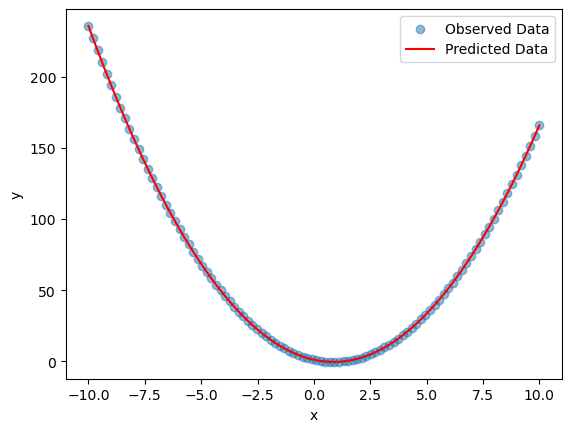

Optimized Mean Squared Error: 0.00


In [65]:
learning_rate = 0.0001
a, b, c, mse_history = gradient_descent(a, b, c, x, y_observed, learning_rate)
y_predicted = a * x**2 + b * x + c
plot_data_and_predictions(x, y_observed, y_predicted)
mse = calculate_mean_squared_error(y_observed, y_predicted)
print(f"Optimized Mean Squared Error: {mse:.2f}")

## Task 4: Iterate and optimize 

<b>Objectiveis</b> to find the optimal values of coefficients a, b, and c that minimize the MSE. In other words, it aims to find the best-fitting quadratic polynomial to the given data points. The result should include:

- Optimized Coefficients (a, b, and c): These are the coefficients that provide the best fit to the data.

- Mean Squared Error (MSE): The final MSE should be as small as possible, indicating how well the optimized polynomial fits the observed data. A smaller MSE suggests a better fit.

- A plot showing the observed data and the predictions made by the optimized polynomial. The plot visually represents how well the model fits the data.

- A plot showing the change in MSE over the iterations. This is useful to visualize the convergence of the optimization process. A decreasing MSE indicates that the optimization is progressing in the right direction.

<b>Formula:</b>

<b>Quadratic Polynomial: </b>

$ y_{\text{predicted}} = ax^2 + bx + c $

<b>Mean Squared Error (MSE): </b>

$ MSE = -\frac{1}{n} \sum_{i=1}^{n} (y_{\text{observed}, i} - y_{\text{predicted}, i})^2 $


<b>Gradient Descent Update Rules: </b>

For $a$:

$a = a - \text{learning_rate} \times \frac{\partial \text{MSE}}{\partial a} $

For $b$:

$b = b - \text{learning_rate} \times \frac{\partial \text{MSE}}{\partial b}$

For $c$:

$c = c - \text{learning_rate} \times \frac{\partial \text{MSE}}{\partial c} $

In [66]:
def optimize_polynomial(a, b, c, x, y_observed, learning_rate=0.0001, num_iterations=1000, stop_threshold=0.001):
    """
    Optimize the polynomial coefficients using gradient descent.

    Parameters:
    a (float): Initial coefficient for x^2 term.
    b (float): Initial coefficient for x term.
    c (float): Initial constant term.
    x (array): Input values.
    y_observed (array): Observed output values.
    learning_rate (float): Learning rate for gradient descent.
    num_iterations (int): Maximum number of iterations.
    stop_threshold (float): Threshold to stop iterating when loss improvement is small.

    Returns:
    a (float): Optimized coefficient for x^2 term.
    b (float): Optimized coefficient for x term.
    c (float): Optimized constant term.
    mse_history (list): List of mean squared error values over iterations.
    """
    mse_history = []
    mse = float('inf')
    for i in range(num_iterations):
        da, db, dc = calculate_gradients(a, b, c, x, y_observed)
        a -= learning_rate * da
        b -= learning_rate * db
        c -= learning_rate * dc
        y_predicted = a * x**2 + b * x + c
        new_mse = calculate_mean_squared_error(y_observed, y_predicted)
        mse_history.append(new_mse)
        if mse - new_mse < stop_threshold:
            break
        mse = new_mse
    return a, b, c, mse_history

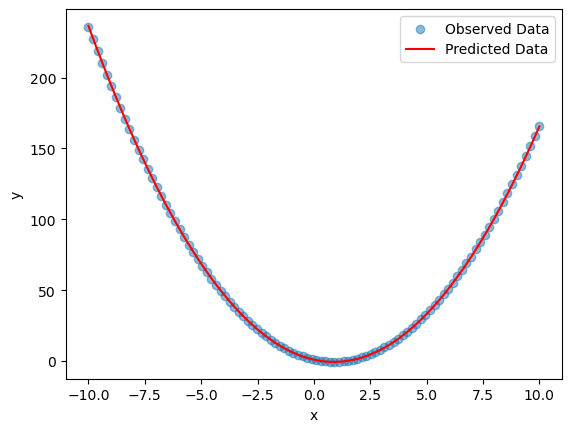

Final Mean Squared Error: 0.07


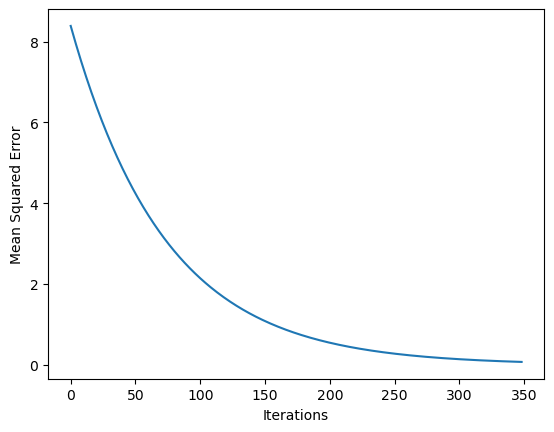

In [67]:
a, b, c = 2, -4, 1  # Reset initial coefficients
a, b, c, mse_history = optimize_polynomial(a, b, c, x, y_observed, learning_rate)
y_predicted = a * x**2 + b * x + c
plot_data_and_predictions(x, y_observed, y_predicted)
mse = calculate_mean_squared_error(y_observed, y_predicted)
print(f"Final Mean Squared Error: {mse:.2f}")
    
# Plot loss over iterations
plt.plot(range(len(mse_history)), mse_history)
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.show()

## Task 5: Optimizing cubic polynomials

<b>Objective: </b>

To optimize the coefficients of a cubic polynomial to best fit observed data using gradient descent.

<b>Optimization Function: </b>

the optimize_cubic_polynomial function minimizes the Mean Squared Error (MSE) between observed and predicted values. The optimization is performed through iterative updates to the polynomial coefficients.

<b>Formula: </b>

$ MSE = -\frac{1}{n} \sum_{i=1}^{n} (y_{\text{observed}, i} - y_{\text{predicted}, i})^2 $

where $ {n} $ is the number of data points, $y_{\text{observed}, i}$ is the observed value, and $y_{\text{predicted}, i}$ is the predicted value.

<b>Gradient Descent: </b>

The optimization process involves calculating the gradients of the cubic polynomial's coefficients with respect to the MSE. The coefficients are then updated in the direction that reduces the MSE.

Formula: Gradient of the MSE with respect to each coefficient

$\frac{\partial \text{coeff}_{j}}{\partial \text{MSE}} = -\frac{2}{n} \sum_{i=1}^{n} (y_{\text{observed}, i} - y_{\text{predicted}, i}) \cdot x_{i}^{(\text{degree} - 1 - j)}$




<b>Stopping Criteria: </b>

The optimization process stops when the improvement in MSE is smaller than a specified threshold (stop_threshold).

<b>Visualization: </b>

the code generates synthetic data for a cubic polynomial and visualizes both the observed and predicted data through a plot.

Outcome: the final result includes the optimized coefficients and the Mean Squared Error for the cubic polynomial.

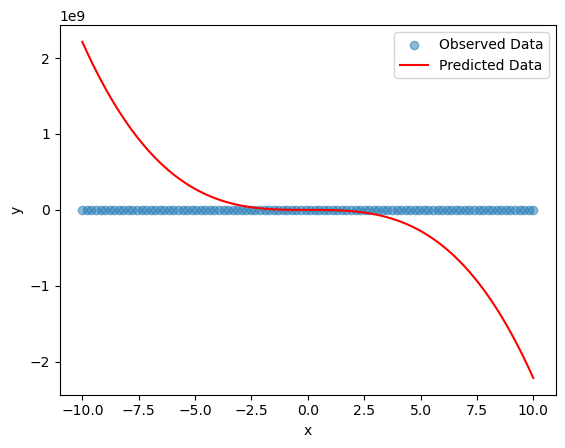

Final Mean Squared Error for Cubic Polynomial: 741579755826229376.00


In [68]:
# Define a new function for optimizing cubic polynomials
def optimize_cubic_polynomial(coefficients, x, y_observed, learning_rate=0.0001, num_iterations=1000, stop_threshold=0.001):
    """
    Optimize the coefficients of a cubic polynomial using gradient descent.

    Parameters:
    coefficients (list): Initial coefficients for the cubic polynomial.
    x (array): Input values.
    y_observed (array): Observed output values.
    learning_rate (float): Learning rate for gradient descent.
    num_iterations (int): Maximum number of iterations.
    stop_threshold (float): Threshold to stop iterating when loss improvement is small.

    Returns:
    optimized_coefficients (list): Optimized coefficients for the cubic polynomial.
    mse_history (list): List of mean squared error values over iterations.
    """
    def calculate_cubic_gradients(coefficients, x, y_observed):
        n = len(x)
        y_predicted = np.polyval(coefficients, x)
        gradients = np.zeros(len(coefficients))
        for i in range(n):
            for j in range(len(coefficients)):
                gradients[j] += -2 / n * (y_observed[i] - y_predicted[i]) * x[i]**(len(coefficients) - 1 - j)
        return gradients

    mse_history = []
    mse = float('inf')
    for i in range(num_iterations):
        gradients = calculate_cubic_gradients(coefficients, x, y_observed)
        for j in range(len(coefficients)):
            coefficients[j] -= learning_rate * gradients[j]
        y_predicted = np.polyval(coefficients, x)
        new_mse = calculate_mean_squared_error(y_observed, y_predicted)
        mse_history.append(new_mse)
        if mse - new_mse < stop_threshold:
            break
        mse = new_mse
    return coefficients, mse_history

# Define initial coefficients for the cubic polynomial
cubic_coefficients = [1.0, 2.0, 3.0, 4.0]  

# Generate data for the cubic polynomial
x, y_observed = generate_cubic_data(cubic_coefficients, jitter=1.0, num_samples=100)

# Call the optimization function with the defined coefficients
optimized_cubic_coefficients, mse_history = optimize_cubic_polynomial(cubic_coefficients, x, y_observed, learning_rate=0.0001)

# Calculate the predicted values for the cubic polynomial
y_predicted = np.polyval(optimized_cubic_coefficients, x)


# Pass cubic coefficients to the new function
optimized_cubic_coefficients, mse_history = optimize_cubic_polynomial(cubic_coefficients, x, y_observed, learning_rate)

# Calculate the predicted values for the cubic polynomial
y_predicted = np.polyval(optimized_cubic_coefficients, x)

# Plot the observed and predicted data
plot_data_and_predictions(x, y_observed, y_predicted)

# Calculate and print the final mean squared error for the cubic polynomial
mse = calculate_mean_squared_error(y_observed, y_predicted)
print(f"Final Mean Squared Error for Cubic Polynomial: {mse:.2f}")


<hr>

## Reflection

<b>Data Generation:</b>

Generates synthetic data for a second-degree polynomial and a cubic polynomial with added noise.
generate_polynomial_data and generate_cubic_data functions are used to create input-output pairs for training.

<b>Gradient Descent:</b>

The gradient_descent function is implemented to optimize the coefficients of a second-degree polynomial using gradient descent.
The optimize_cubic_polynomial function is created to optimize the coefficients of a cubic polynomial using gradient descent.

<b>Plotting:</b>

plot_data_and_predictions is a utility function to visualize observed data and model predictions.
Loss over iterations is plotted to observe the convergence of the optimization process.

<b>Mean Squared Error (MSE):</b>

calculate_mean_squared_error computes the mean squared error between observed and predicted values.

<b>Observations:</b>

Generated with noise, and the goal is to use gradient descent to fit a polynomial to this noisy data.
The gradient descent technique is applied to minimize the mean squared error, effectively adjusting the polynomial coefficients.
The code includes a stopping threshold to terminate optimization when the improvement in loss becomes small.

<b>Cubic Polynomial Optimization:</b>

Extends the optimization technique to a cubic polynomial, demonstrating its flexibility for different polynomial degrees.

<b>Visualization:</b>

Visualizes the observed data, the initial fit, and the optimized fit for both the second-degree and cubic polynomials.
Loss over iterations is visualized to observe the convergence of the optimization process.

<b>Adjustable Parameters:</b>

Parameters such as the learning rate, initial coefficients, and stopping threshold are adjustable, allowing for experimentation and fine-tuning.

<b>Code Structure:</b>

Modular, with distinct functions for data generation, optimization, and visualization, enhancing readability and reusability.

<b>Potential Improvements:</b>

Functional, improvements could include additional comments for clarity and more detailed explanations of the mathematical concepts. Experimenting with different optimization algorithms or learning rate schedules could provide insights into optimization performance.

## Feedback 

Jason suggested:
- x = np.random.uniform(-10, 10, num_samples)

You could use something like:

- x = np.linspace(-10, 10, num_points)

## Reference

Domingos, Pedro. “A Few Useful Things to Know about Machine Learning.” Communications of the ACM, vol. 55, no. 10, 1 Oct. 2012, p. 78, https://doi.org/10.1145/2347736.2347755.

Garvey, Mark. “Polynomial Regression — Gradient Descent from Scratch.” Medium, 19 Jan. 2021, towardsdatascience.com/polynomial-regression-gradient-descent-from-scratch-279db2936fe9. Accessed 3 Nov. 2023.

Mainkar, S. (2018). Gradient Descent in Python. [online] Medium. Available at: https://towardsdatascience.com/gradient-descent-in-python-a0d07285742f.


## Appendix 

## Visualizing the loss over iterations during the gradient descent optimization process 

<b>Plotting Loss Over Iterations:</b>

It allows visualizing how the mean squared error changes over the course of gradient descent iterations.
The plot provides insights into the convergence behavior, showing whether the optimization process is stabilizing or fluctuating.

<b>Comparison of Initial and Final Mean Squared Error:</b>

Storing the initial mean squared error before gradient descent and comparing it with the final mean squared error after optimization is a good practice. This comparison helps assess how well the optimization process has improved the model's fit to the data.

<b>Interpretation:</b>

The final print statements, which display both the initial and final mean squared errors, offer a clear interpretation of the optimization results. This information is valuable for understanding the impact of the gradient descent process on the model's performance.

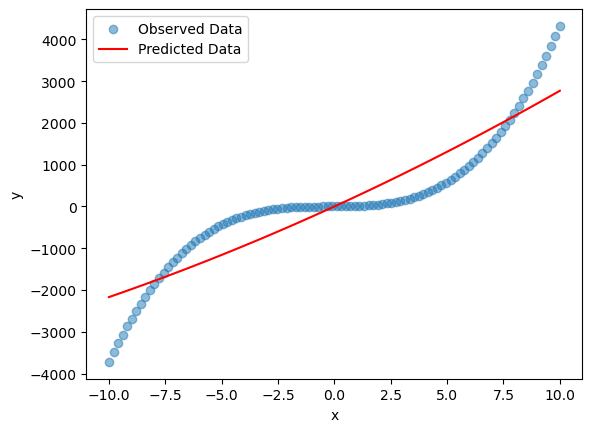

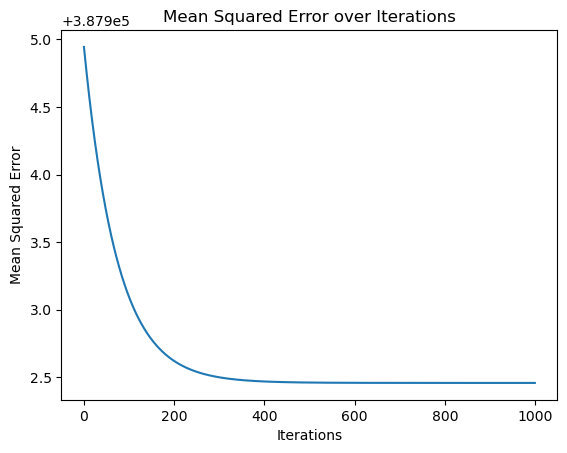

Initial Mean Squared Error: 741579755826229376.00
Final Mean Squared Error: 387902.46


In [70]:
def plot_loss_over_iterations(mse_history):
    """
    Plot the mean squared error over iterations.

    Parameters:
    mse_history (list): List of mean squared error values over iterations.
    """
    plt.plot(range(len(mse_history)), mse_history)
    plt.xlabel('Iterations')
    plt.ylabel('Mean Squared Error')
    plt.title('Mean Squared Error over Iterations')
    plt.show()

# Before calling gradient descent, store the initial mean squared error for comparison
initial_mse = calculate_mean_squared_error(y_observed, y_predicted)

# Perform gradient descent
a, b, c, mse_history = gradient_descent(a, b, c, x, y_observed, learning_rate)

# Plot observed vs predicted data
plot_data_and_predictions(x, y_observed, a * x**2 + b * x + c)

# Plot the loss over iterations
plot_loss_over_iterations(mse_history)

# After optimization, print the final mean squared error and compare it with the initial error
final_mse = calculate_mean_squared_error(y_observed, a * x**2 + b * x + c)
print(f"Initial Mean Squared Error: {initial_mse:.2f}")
print(f"Final Mean Squared Error: {final_mse:.2f}")
